Importação das bibliotecas do modelo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import preprocess_kgptalkie as ps

Carregando a nossa base de dados do IMDB para um DataFrame

In [38]:
df = pd.read_csv(r'C:\Users\matheus.capanema\Downloads\imdb-reviews-pt-br.csv\imdb-reviews-pt-br.csv')

Visualizando dados

In [39]:
df.shape
df.columns
df.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


Pre processamento

In [40]:
df['word_counts'] = df['text_pt'].apply(lambda x: ps.get_wordcounts(x))
df['char_counts'] = df['text_pt'].apply(lambda x: ps.get_charcounts(x))
df['avg_wordlength'] = df['text_pt'].apply(lambda x: ps.get_avg_wordlength(x))
df['stopwords_counts'] = df['text_pt'].apply(lambda x: ps.get_stopwords_counts(x))
df['text_pt'] = df['text_pt'].str.lower()

In [41]:
from bs4 import BeautifulSoup


df['text_pt'] = df['text_pt'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text().strip())

C:\Users\matheus.capanema\AppData\Local\Temp\ipykernel_1256\3095943365.py:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  df['text_pt'] = df['text_pt'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text().strip())


In [42]:
df['text_pt_without_stopwords'] = df['text_pt'].apply(lambda x: ps.remove_stopwords(x))

In [43]:
df.head()

,id,text_en,text_pt,sentiment,word_counts,char_counts,avg_wordlength,stopwords_counts,text_pt_without_stopwords
0,1,Once again Mr. Costner has dragged out a movie...,"mais uma vez, o sr. costner arrumou um filme p...",neg,168,811,4.827381,10,"mais uma vez, o sr. costner arrumou um filme p..."
1,2,This is an example of why the majority of acti...,este é um exemplo do motivo pelo qual a maiori...,neg,245,1129,4.608163,9,este é um exemplo motivo pelo qual maioria dos...
2,3,"First of all I hate those moronic rappers, who...","primeiro de tudo eu odeio esses raps imbecis, ...",neg,213,973,4.568075,5,"primeiro de tudo eu odeio esses raps imbecis, ..."
3,4,Not even the Beatles could write songs everyon...,nem mesmo os beatles puderam escrever músicas ...,neg,324,1525,4.706790,16,nem mesmo os beatles puderam escrever músicas ...
4,5,Brass pictures movies is not a fitting word fo...,filmes de fotos de latão não é uma palavra apr...,neg,244,1288,5.278689,8,filmes de fotos de latão não é uma palavra apr...


Plotando Dados no Gráfico

In [44]:
import seaborn as sns

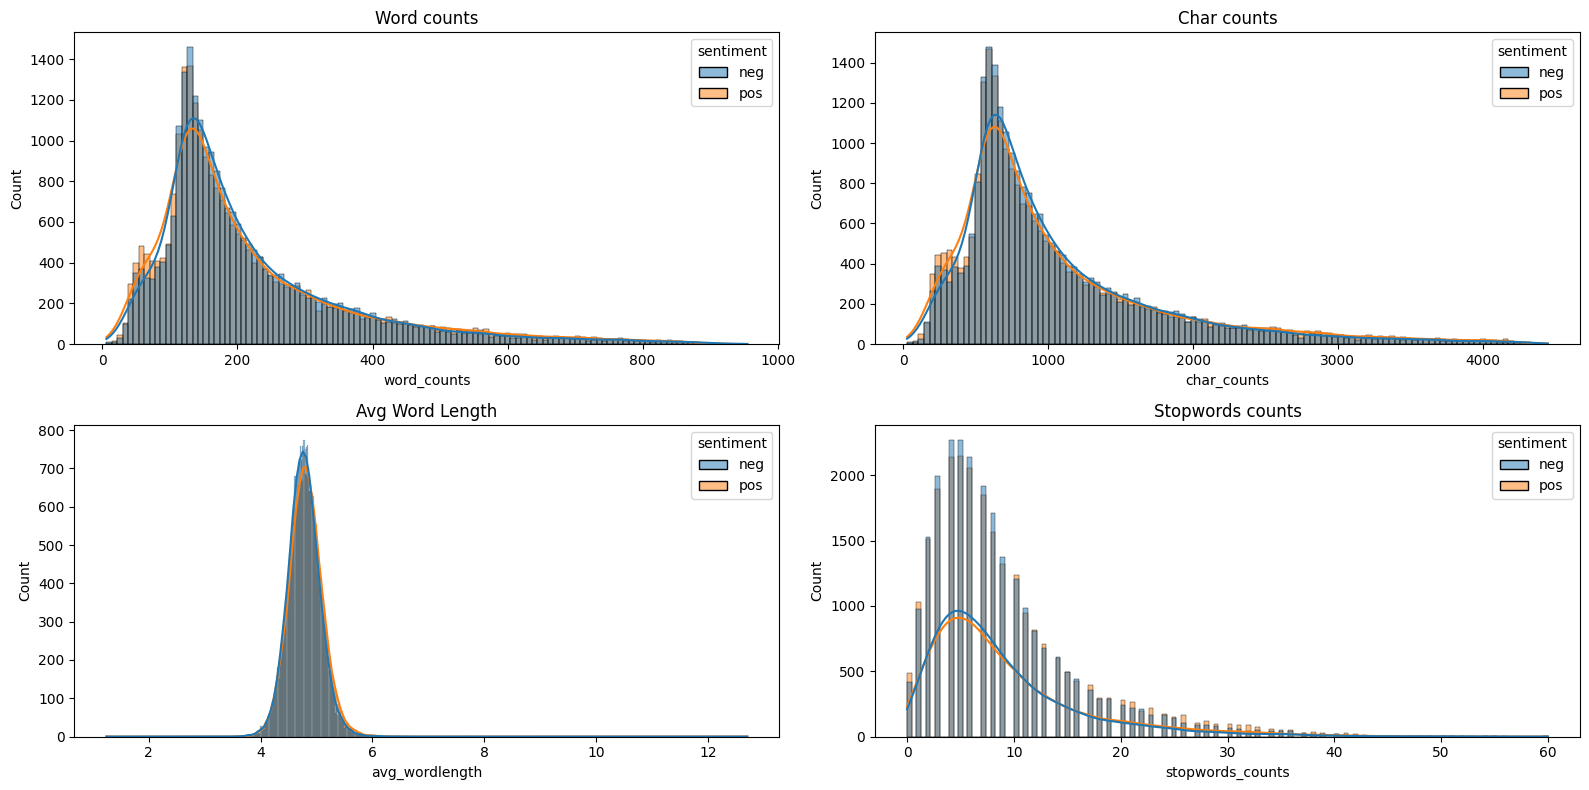

In [45]:
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
# sns.barplot(x='sentiment', y='word_counts', data=df)
sns.histplot(data=df, x='word_counts', hue='sentiment', kde=True)
plt.title('Word counts')

plt.subplot(2,2,2)
sns.histplot(data=df, x='char_counts', hue='sentiment', kde=True)
plt.title('Char counts')

plt.subplot(2,2,3)
sns.histplot(data=df, x='avg_wordlength', hue='sentiment', kde=True)
plt.title('Avg Word Length')

plt.subplot(2,2,4)
sns.histplot(data=df, x='stopwords_counts', hue='sentiment', kde=True)
plt.title('Stopwords counts')

plt.tight_layout()
plt.show()

Word Embedding e Construção do Modelo 

In [46]:
# steps
# train test split -> tfidf -> ml algo -> fit -> prediction -> evaluation

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

In [48]:
X_train, X_test, y_train, y_test = train_test_split(df['text_pt'], 
                                                    df['sentiment'],
                                                    test_size=0.2,
                                                    random_state=0,
                                                    stratify=df['sentiment']
                                                   )

In [49]:
X_train.shape, X_test.shape

((39567,), (9892,))

In [50]:
clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [52]:
clf.fit(X_train, y_train)

c:\Users\matheus.capanema\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [53]:
y_pred = clf.predict(X_test)

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         neg       0.90      0.89      0.90      4953
         pos       0.89      0.90      0.90      4939

    accuracy                           0.90      9892
   macro avg       0.90      0.90      0.90      9892
weighted avg       0.90      0.90      0.90      9892



(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

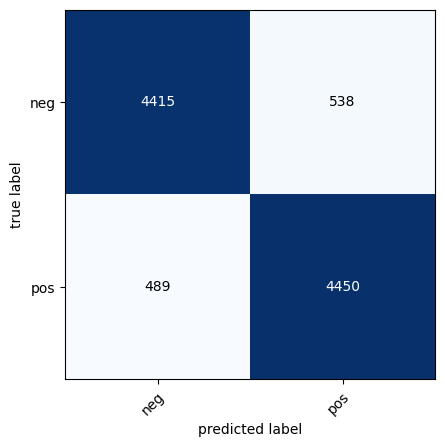

In [55]:
from mlxtend.plotting import plot_confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, class_names=clf.classes_)

In [56]:
clf.predict(['O filme é bom'])

array(['pos'], dtype=object)

In [57]:
import pickle

In [58]:
pickle.dump(clf,open('sentiment_model.pkl', 'wb'))